### Import neccessary packages ###

In [1]:
import pandas as pd
import numpy as np
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
%matplotlib notebook
%matplotlib inline
import seaborn as sbn
from sklearn.preprocessing import StandardScaler
from timeit import default_timer as timer
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder

### Read the file ###

In [2]:
# load the file
houseData = pd.read_csv('AmesHousing.csv', keep_default_na=False)


In [3]:
# Check the initial shape of the data. The result is 2930 rows, 82 columns
print ('Initial shape of the houseData is', houseData.shape)


Initial shape of the houseData is (2930, 82)


In [4]:
# See the initial data types of each columns
houseData.dtypes

Order              int64
PID                int64
MS SubClass        int64
MS Zoning         object
Lot Frontage      object
Lot Area           int64
Street            object
Alley             object
Lot Shape         object
Land Contour      object
Utilities         object
Lot Config        object
Land Slope        object
Neighborhood      object
Condition 1       object
Condition 2       object
Bldg Type         object
House Style       object
Overall Qual       int64
Overall Cond       int64
Year Built         int64
Year Remod/Add     int64
Roof Style        object
Roof Matl         object
Exterior 1st      object
Exterior 2nd      object
Mas Vnr Type      object
Mas Vnr Area      object
Exter Qual        object
Exter Cond        object
                   ...  
Bedroom AbvGr      int64
Kitchen AbvGr      int64
Kitchen Qual      object
TotRms AbvGrd      int64
Functional        object
Fireplaces         int64
Fireplace Qu      object
Garage Type       object
Garage Yr Blt     object


In [5]:
# Check duplicates row in dataframe. The result is we find no duplicates in the data row.
houseData[houseData.duplicated(keep=False)]

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice


In [6]:
# Removing spaces from column names to have better access
houseData.columns = houseData.columns.str.replace(' ',"")

# Change the empty field into NAN
houseData.replace(to_replace = "", value = np.NAN,inplace=True)

# See all the columns in dataframe houseData
houseData.columns

Index(['Order', 'PID', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea',
       'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemod/Add', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd',
       'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 

In [7]:
# Check how many columns contains empty value (empty row)
houseData.columns[houseData.isnull().sum() != 0].size

21

In [8]:
# Display which columns has empty value (empty row)
houseData.columns[houseData.isnull().sum() != 0]

Index(['LotFrontage', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Electrical', 'BsmtFullBath',
       'BsmtHalfBath', 'GarageYrBlt', 'GarageFinish', 'GarageCars',
       'GarageArea', 'GarageQual', 'GarageCond'],
      dtype='object')

In [9]:
# See how many values are empty in each column which has empty value (empty row)
houseData.loc[:,houseData.columns[houseData.isnull().sum() != 0]].isnull().sum().sort_values()

BsmtUnfSF         1
GarageArea        1
GarageCars        1
Electrical        1
TotalBsmtSF       1
GarageQual        1
BsmtFinSF2        1
GarageCond        1
BsmtFinType1      1
BsmtCond          1
BsmtQual          1
BsmtFinSF1        1
BsmtFinType2      2
BsmtFullBath      2
BsmtHalfBath      2
GarageFinish      2
BsmtExposure      4
MasVnrArea       23
MasVnrType       23
GarageYrBlt     159
LotFrontage     490
dtype: int64

## DATA CLEANING ##

**Part 1. Fill in missing value**

a. We fill in 159 empty value in column "GarageYrBlt" with the 0 (zero) value because it means that the property has no garage. In the corresponding row in column 'GarageType', it mentioned that the row which has NaN value in the column "GarageYrBlt", is not having garage (NA).


In [10]:
# Fill NaN in column 'GarageYrBlt' based in value from 'YearBuilt'
houseData['GarageYrBlt'].fillna(value = 0, inplace = True)


b. LotFrontage is most likely similar in the same neighborhood. We fill the missing value in column 'LotFrontage' with median value of LotFrontage in the corresponding neighborhood. <br>
We will get warning message after run above code: Anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1018: RuntimeWarning: Mean of empty slice return np.nanmean(a, axis, out=out, keepdims=keepdims)<br>
It means that there is groupby neighborhood which has empty 'LotFrontage'. <br>
If the median result of the similar neighborhood is np.NAN (i.e there is no LotFrontAge value in those neighborhood, then fill lotFrontage value with 0). <br>


In [11]:
# We fill the missing value in column 'LotFrontage' with median value of LotFrontage in the corresponding neighborhood
houseData['LotFrontage'] = houseData.groupby(["Neighborhood"])['LotFrontage'].transform(lambda x:x.fillna(x.median()))

# We will get warning message after run above code: Anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1018: RuntimeWarning: Mean of empty slice return np.nanmean(a, axis, out=out, keepdims=keepdims)
# It means that there is groupby neighborhood which has empty 'LotFrontage'.
# If the median result of the similar neighborhood is np.NAN (i.e there is no LotFrontAge value in those neighborhood, then fill lotFrontage value with 0)
houseData['LotFrontage'].fillna(value = 0, inplace = True)
    
# Check missing value in LotFrontage 
houseData[houseData['LotFrontage'].isnull()] 

/root/anaconda3/lib/python3.6/site-packages/numpy/lib/nanfunctions.py:1018: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


,Order,PID,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


c. Fill missing value in column 'GarageFinish',  'GarageQual', 'GarageCond' with NA (No Garage).

In [12]:
# Fill missing value in column 'GarageFinish', 'GarageQual', 'GarageCond' with NA (No Garage).
for column in ['GarageFinish', 'GarageQual', 'GarageCond']:
    houseData[column].fillna("NA", inplace=True)

d. Fill missing value in column 'GarageArea' and 'GarageCars' with 0 (it means the property has no Garage area, hence no car in the garage).

In [13]:
# Fill missing value in column 'GarageArea' and 'GarageCars' with 0 (it means the property has no Garage area, hence no car in the garage).
houseData['GarageArea'] = houseData['GarageArea'].fillna(value = 0)
houseData['GarageCars'] = houseData['GarageCars'].fillna(value = 0)

e. Fill missing value in column 'BsmtQual', 'BsmtCond', 'BsmtFinType1', 'BsmtFinType2' with NA (it means the property has no basement).

In [14]:
# Fill missing value in column 'BsmtQual', 'BsmtCond', 'BsmtFinType1', 'BsmtFinType2' with NA.
for column in ['BsmtQual', 'BsmtCond', 'BsmtFinType1', 'BsmtFinType2']:
    houseData[column].fillna("NA", inplace=True)

f. Fill missing value in column 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'BsmtHalfBath', 'BsmtFullBath', and 'TotalBsmtSF' with value 0. No basement means having 0 area or squarefeet of basement.

In [15]:
# Fill missing value in column 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'BsmtHalfBath', 'BsmtFullBath', and 'TotalBsmtSF' with value 0

for column in ['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'BsmtHalfBath', 'BsmtFullBath', 'TotalBsmtSF']:
    houseData[column].fillna(value = 0, inplace=True)

g. We fill the missing value in column 'BsmtExposure' with most frequent value of 'BsmtExposure' in the corresponding (groupby) 'BsmtCond'.

In [16]:
# Fill the missing value in column 'BsmtExposure' with most frequent value of 'BsmtExposure' in the corresponding (groupby) 'BsmtCond'
houseData['BsmtExposure'] = houseData.groupby(["BsmtCond"])['BsmtExposure'].apply(lambda x:x.fillna(x.value_counts().index.tolist()[0]))

h. We fill missing value in column 'Electrical' with most frequent value (mode) in this column. It seems that most housing in these days has electrical. The value will be SBrkr (Standard Circuit Breakers & Romex).


In [17]:
# Fill missing value in column 'Electrical' with most frequent value (mode) in this column.
houseData['Electrical'] = houseData['Electrical'].fillna(houseData['Electrical'].mode()[0])

i. We fill missing value in column 'MasVnrType' with 'None' and missing value in column 'MasVnrArea' with value zero (0).

In [18]:
# We fill missing value in column 'MasVnrType' with 'None' and missing value in column 'MasVnrArea' with value zero (0)
houseData['MasVnrType'] = houseData['MasVnrType'].fillna("None")
houseData['MasVnrArea'] = houseData['MasVnrArea'].fillna(value = 0)

In [19]:
# Check again the missing value
houseData.columns[houseData.isnull().sum() != 0]

Index([], dtype='object')

**Part 2. Convert the categorical variables into ordinal variables**

a. Columns 'ExterQual','PoolQC' ,'ExterCond','BsmtQual','BsmtCond','HeatingQC','KitchenQual','FireplaceQu', 'GarageQual','GarageCond' have same categorical values. So we can map them with same key-value pairs.

In [20]:
houseData.loc[:, ['ExterQual','PoolQC' ,'ExterCond','BsmtQual','BsmtCond','HeatingQC','KitchenQual','FireplaceQu', 'GarageQual','GarageCond']].sample(10)


,ExterQual,PoolQC,ExterCond,BsmtQual,BsmtCond,HeatingQC,KitchenQual,FireplaceQu,GarageQual,GarageCond
2357,TA,Fa,TA,TA,TA,Fa,Gd,Fa,TA,TA
561,TA,NA,TA,TA,TA,Gd,TA,Po,TA,TA
2341,Ex,NA,TA,Ex,TA,Ex,Ex,Gd,TA,TA
1974,TA,NA,Gd,Fa,Fa,Ex,TA,NA,TA,Gd
1782,Gd,NA,TA,Ex,TA,Ex,Gd,Gd,TA,TA
546,Gd,NA,Gd,Gd,Gd,Ex,Gd,NA,TA,TA
1375,TA,NA,Gd,TA,TA,Gd,TA,NA,NA,NA
2018,TA,NA,TA,TA,TA,Ex,TA,NA,TA,TA
1250,TA,NA,TA,TA,TA,Gd,TA,NA,TA,TA
270,Gd,NA,TA,Gd,TA,Ex,Gd,TA,TA,TA


In [21]:
# Columns 'ExterQual','PoolQC' ,'ExterCond','BsmtQual','BsmtCond','HeatingQC','KitchenQual','FireplaceQu', 'GarageQual','GarageCond' have same categorical values. So we can map them with same key-value pairs
convert_dict = {"NA": 0, "Po": 1, "Fa": 2, "TA": 3, "Gd": 4, "Ex": 5}
cols = ['ExterQual','PoolQC' ,'ExterCond','BsmtQual','BsmtCond','HeatingQC','KitchenQual','FireplaceQu', 'GarageQual','GarageCond']
for col in cols:
    houseData[col].replace(convert_dict, inplace=True)

b. Convert BsmtExposure, BsmtFinType1 and BsmtFinType2 into categorical values

In [22]:
# Convert BsmtExposure
houseData['BsmtExposure'].replace({"NA": 0, "No": 1, "Mn": 2, "Av": 3, "Gd": 4}, inplace=True)
houseData['BsmtExposure'].sample(10)

849     1
377     3
636     1
2917    1
1902    1
1463    1
917     2
1802    2
243     0
1574    4
Name: BsmtExposure, dtype: int64

In [23]:
# Convert BsmtFinType1 and BsmtFinType2
convert_dict = {"NA": 0, "Unf": 1, "LwQ": 2, "Rec": 3, "BLQ": 4, "ALQ": 5, "GLQ": 6}
houseData["BsmtFinType1"].replace(convert_dict, inplace=True)
houseData["BsmtFinType2"].replace(convert_dict, inplace=True)
houseData.loc[:, ["BsmtFinType1", "BsmtFinType2"]].sample(10)

,BsmtFinType1,BsmtFinType2
1502,5,1
448,6,1
119,5,1
704,1,1
1654,6,1
2704,6,2
827,6,1
33,5,1
1445,6,1
2220,6,1


In [24]:
# Convert Functional, GarageFinish, Fence
houseData["Functional"].replace({"NA": 0, "Sal": 1, "Sev": 2, "Maj2": 3, "Maj1": 4, "Mod": 5, "Min2": 6, "Min1": 7, "Typ": 8}, inplace=True)
houseData["GarageFinish"].replace({"NA": 0, "Unf": 1, "RFn": 2, "Fin": 3}, inplace=True)
houseData["Fence"].replace({"NA": 0, "MnWw": 1, "GdWo": 2, "MnPrv": 3, "GdPrv": 4}, inplace=True)
houseData.loc[:, ["Functional", "GarageFinish", "Fence"]].sample(10)

,Functional,GarageFinish,Fence
1671,8,1,2
2922,8,1,0
2250,8,3,0
1020,8,3,0
458,8,3,0
1870,8,1,0
483,8,3,0
1104,8,2,0
1053,8,3,0
2494,8,1,3


c. Convert CentralAir

In [25]:
# Convert CentralAir
houseData["CentralAir"].replace({"N": 0, "Y": 1}, inplace=True)
houseData["CentralAir"].sample(10)

1540    1
997     1
866     1
1298    1
423     1
303     1
1417    0
1061    1
103     1
2230    1
Name: CentralAir, dtype: int64

d. For the other categorical variables which is not ordinal values, we can use LabelEncoder from sklearn to convert them to numerical variables

In [26]:
# For the other categorical variables which is not ordinal values, we can use LabelEncoder from sklearn to convert them to numerical variables
encoder = LabelEncoder()

# list of columns.
cols = ['MSZoning','LotConfig','Neighborhood','Exterior1st','BldgType','HouseStyle','MSSubClass','Foundation',
        'Condition1','RoofStyle','SaleCondition','Exterior2nd','SaleType','Street','MasVnrType','Alley',
        'LotShape','LandContour','Utilities','LandSlope','Condition2','RoofMatl','Heating','Electrical',
        'GarageType','PavedDrive','MiscFeature']

# convert to numerical.
for col in cols:
    encoder.fit(houseData[col])
    houseData[col] = encoder.transform(houseData[col])

# check
houseData.loc[:, cols].sample(10)

,MSZoning,LotConfig,Neighborhood,Exterior1st,BldgType,HouseStyle,MSSubClass,Foundation,Condition1,RoofStyle,...,LandContour,Utilities,LandSlope,Condition2,RoofMatl,Heating,Electrical,GarageType,PavedDrive,MiscFeature
1359,6,4,11,12,0,2,1,0,7,1,...,3,0,0,2,1,1,4,5,0,2
722,6,4,20,8,0,2,1,0,2,3,...,3,0,0,2,1,2,4,5,2,2
718,6,4,20,12,0,5,6,0,2,1,...,3,0,0,2,1,1,4,1,0,2
1061,5,4,19,13,0,5,5,2,2,3,...,3,0,0,2,1,1,4,3,2,2
2456,5,1,24,13,0,2,0,2,6,1,...,3,0,0,2,1,1,4,1,2,2
1700,5,1,19,8,0,5,5,2,2,1,...,3,0,0,2,1,1,4,3,2,2
2459,5,0,24,13,0,2,0,2,1,1,...,3,0,0,2,1,1,4,1,2,2
1620,5,4,25,5,4,2,11,2,2,1,...,3,0,0,2,1,1,4,1,2,2
1670,5,2,15,8,0,2,0,0,2,1,...,3,0,0,2,1,1,4,2,2,2
2223,5,1,6,14,0,2,0,1,2,1,...,3,0,0,2,1,1,4,1,2,2


d. Check columns are not int and we need to convert those variables to numeric.

In [27]:
# Check columns are not int
houseData.select_dtypes(exclude=[np.integer]).columns

Index(['LotFrontage', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'GarageYrBlt',
       'GarageCars', 'GarageArea'],
      dtype='object')

In [28]:
# We need to convert those variables to numeric
cols = ['LotFrontage', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'GarageYrBlt',
       'GarageCars', 'GarageArea']

for col in cols:
    houseData[col] = pd.to_numeric(houseData[col])

# Check
houseData.loc[:, cols].head(10)

,LotFrontage,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,BsmtFullBath,BsmtHalfBath,GarageYrBlt,GarageCars,GarageArea
0,141.0,112,639,0,441,1080,1,0,1960,2,528
1,80.0,0,468,144,270,882,0,0,1961,1,730
2,81.0,108,923,0,406,1329,0,0,1958,1,312
3,93.0,0,1065,0,1045,2110,1,0,1968,2,522
4,74.0,0,791,0,137,928,0,0,1997,2,482
5,78.0,20,602,0,324,926,0,0,1998,2,470
6,41.0,0,616,0,722,1338,1,0,2001,2,582
7,43.0,0,263,0,1017,1280,0,0,1992,2,506
8,39.0,0,1180,0,415,1595,1,0,1995,2,608
9,60.0,0,0,0,994,994,0,0,1999,2,442


In [29]:
houseData.sample(20)

,Order,PID,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
2896,2897,916403020,0,5,50.0,8049,1,1,0,3,...,0,0,0,2,0,7,2006,9,4,180000
2848,2849,909201180,15,4,58.0,6430,1,1,3,0,...,0,0,0,2,0,7,2006,9,0,128000
685,686,535454100,4,5,60.0,10800,1,1,3,3,...,0,0,0,2,0,8,2009,9,4,133500
2254,2255,914478100,9,5,82.0,8410,1,1,0,3,...,0,0,0,2,0,4,2007,9,4,143000
2694,2695,903455090,4,6,60.0,7200,1,1,3,3,...,0,0,3,2,0,7,2006,9,4,125500
2110,2111,906392080,0,5,64.0,7242,1,1,3,3,...,0,0,0,2,0,7,2007,9,4,175900
1440,1441,907192130,0,5,88.0,12803,1,1,0,3,...,0,0,0,2,0,9,2008,9,4,221000
198,199,903232190,4,6,52.0,6240,1,1,3,3,...,0,0,0,2,0,5,2010,9,4,123900
1595,1596,923225200,13,6,41.0,2665,1,1,3,3,...,0,0,0,2,0,5,2008,9,4,129500
1051,1052,528102110,5,5,96.0,12474,1,1,3,3,...,0,0,0,2,0,8,2008,6,5,426000


e. We set the Order column as index

In [30]:
# Set Order column as index
houseData.set_index('Order', inplace=True)

f. We remove PID column since we think it's not relevant to predictive model

In [31]:
# Remove PID column since it's not relevant to predictive model
houseData.drop(columns=['PID'], inplace=True)

## DATA OBSERVATION ##

The target column is 'SalePrice'. We can display the correlation between column 'SalePrice' to the other column.

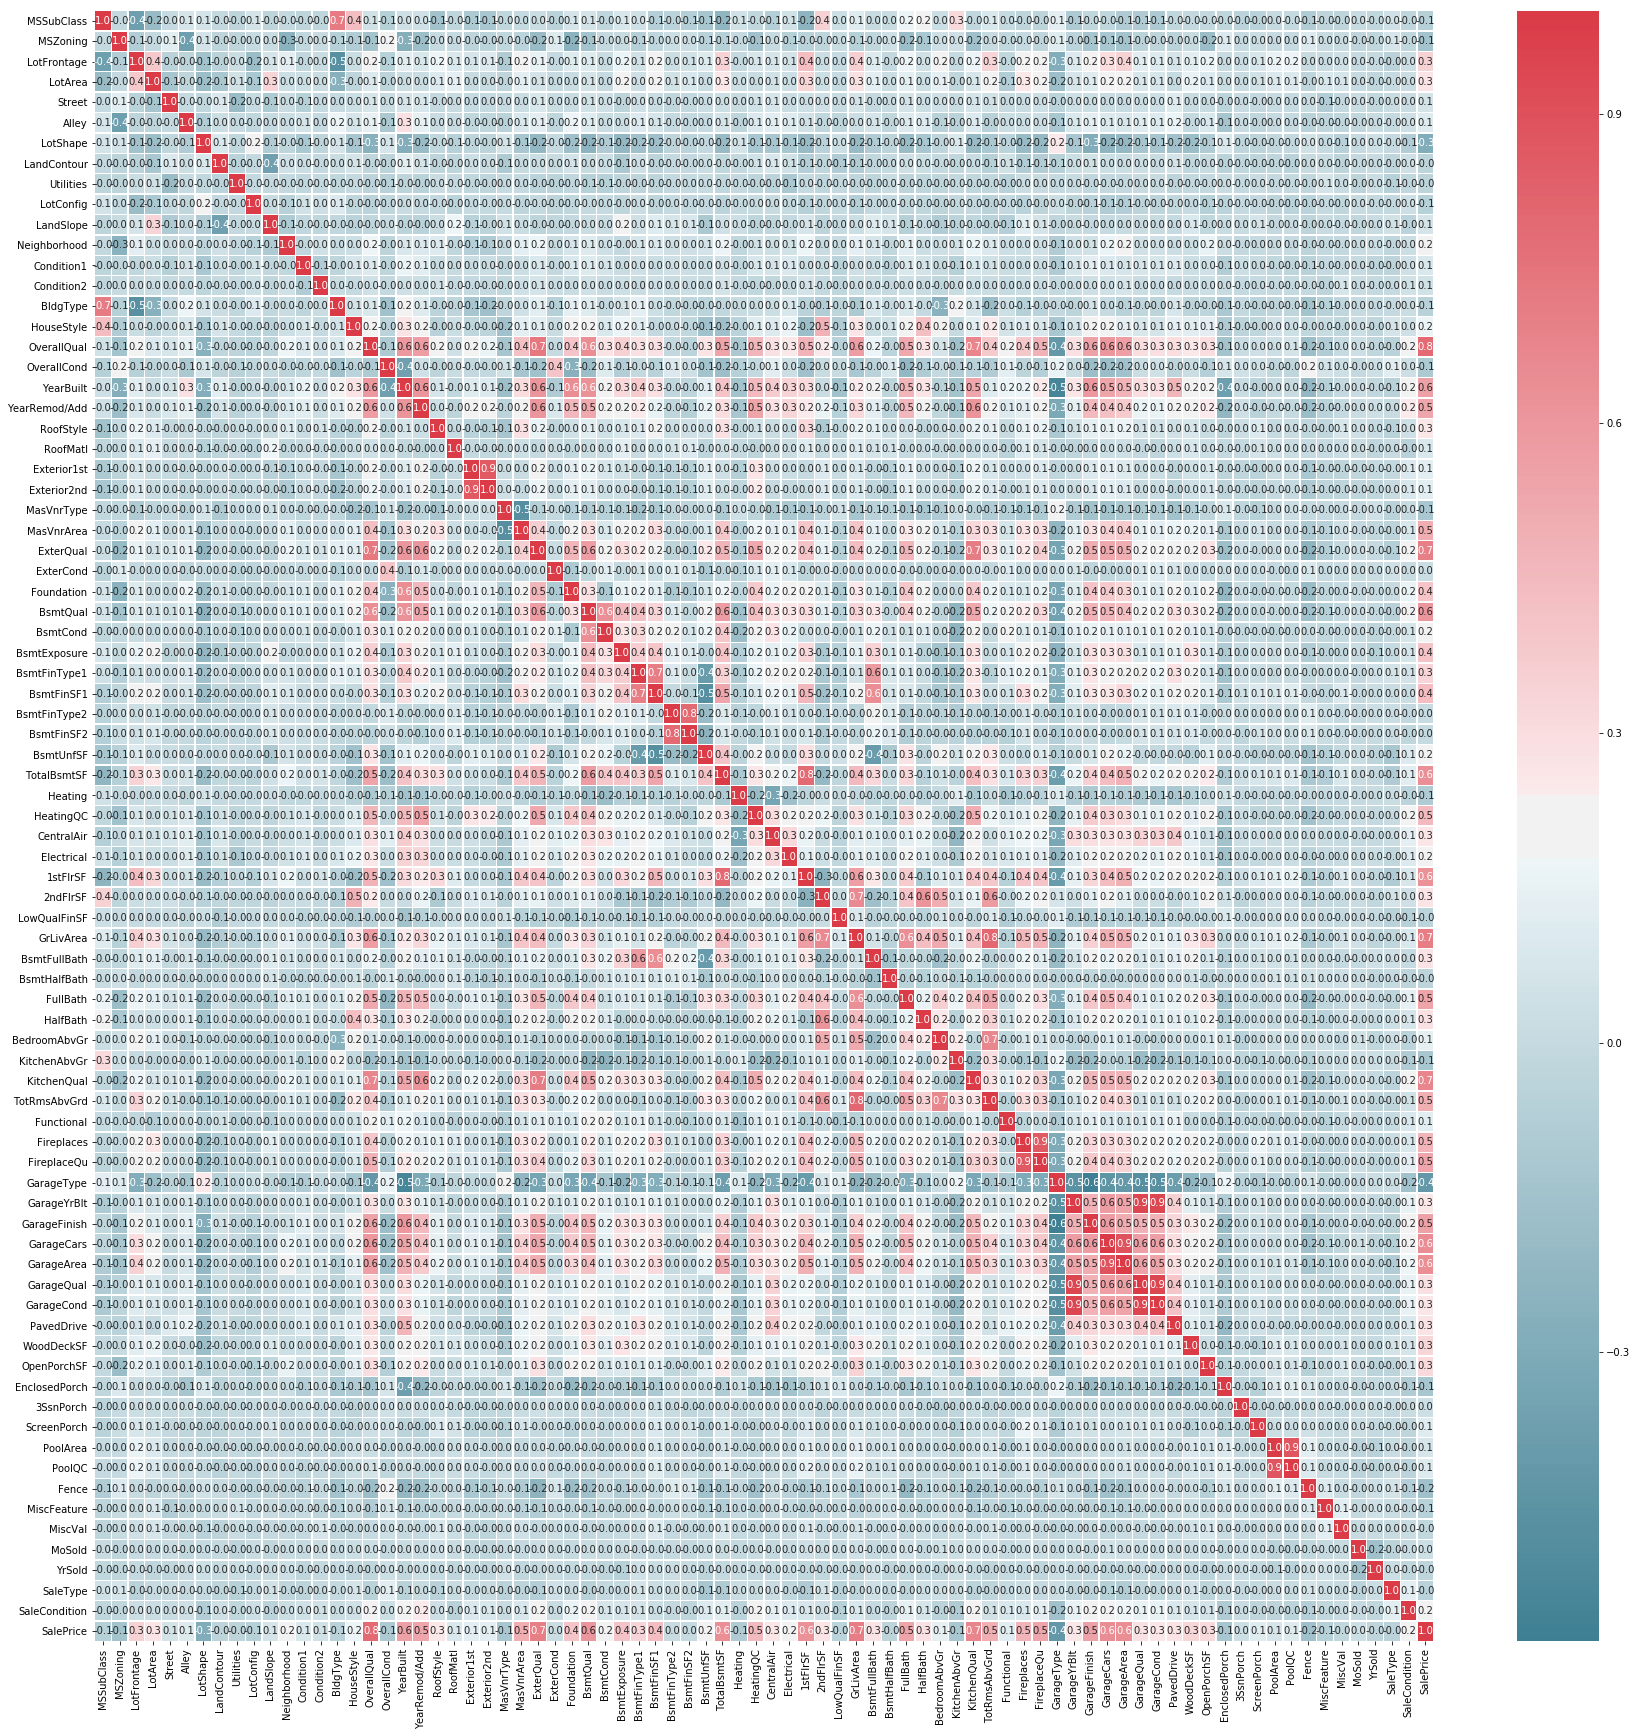

In [32]:
# Display the correlation heatmap

fig = plt.figure(figsize=(30,30))
ax = fig.add_subplot(1,1,1)
colormap = sbn.diverging_palette(220, 10, as_cmap=True)
sbn.heatmap(houseData.corr(), cmap=colormap, annot=True, linewidths=.4, fmt='.1f', ax=ax)

In [33]:
# Sorted the most important features correlated to Sale Price
corr = houseData.corr()
corr.sort_values(["SalePrice"], ascending = False, inplace = True)
print("Most important feature correlated to Sale Price")
print(corr.SalePrice)

Most important feature correlated to Sale Price
SalePrice        1.000000
OverallQual      0.799262
GrLivArea        0.706780
ExterQual        0.697970
KitchenQual      0.672914
GarageCars       0.647562
GarageArea       0.640138
TotalBsmtSF      0.632529
1stFlrSF         0.621676
BsmtQual         0.607532
YearBuilt        0.558426
GarageFinish     0.549899
FullBath         0.545604
FireplaceQu      0.533901
YearRemod/Add    0.532974
MasVnrArea       0.502196
TotRmsAbvGrd     0.495474
Fireplaces       0.474558
HeatingQC        0.450325
BsmtFinSF1       0.433147
BsmtExposure     0.412216
Foundation       0.406601
LotFrontage      0.349463
BsmtFinType1     0.336965
WoodDeckSF       0.327143
OpenPorchSF      0.312951
HalfBath         0.285056
GarageQual       0.277952
PavedDrive       0.275964
BsmtFullBath     0.275823
                   ...   
RoofMatl         0.087918
PoolArea         0.068403
LandSlope        0.066396
Street           0.059519
Condition2       0.054331
MoSold          

Based on correlation heatmap above, some features which has high correlation with 'SalePrice' are: OverallQual,GrLivArea,ExterQual, KitchenQual, GarageCars, GarageArea, TotalBsmtSF, 1stFlrSF, BsmtQual This correlation will be proven after we run our algorithm modelling.

In [34]:
# Show the correlation summary
houseData.corr()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
MSSubClass,1.000000,-0.006329,-0.372050,-0.196098,0.003079,0.067993,0.056495,-0.007419,-0.027523,0.060164,...,0.004022,-0.003715,-0.084292,-0.028048,-0.029057,0.010618,-0.016925,0.044721,-0.024266,-0.065494
MSZoning,-0.006329,1.000000,-0.074488,-0.010588,0.121061,-0.371265,0.057889,-0.035519,-0.027307,0.004010,...,0.002386,0.002434,0.102662,0.006731,0.011229,-0.025028,-0.024299,0.069416,-0.016172,-0.137472
LotFrontage,-0.372050,-0.074488,1.000000,0.388280,-0.046829,-0.036865,-0.144939,-0.044029,0.022872,-0.182909,...,0.155085,0.169462,0.011028,0.016602,0.038382,0.004418,-0.004180,-0.043586,0.027764,0.349463
LotArea,-0.196098,-0.010588,0.388280,1.000000,-0.133966,-0.027129,-0.177461,-0.120979,0.054454,-0.116868,...,0.093775,0.096183,-0.030525,0.081240,0.069188,0.003859,-0.023085,-0.000118,0.019079,0.266549
Street,0.003079,0.121061,-0.046829,-0.133966,1.000000,-0.003542,-0.017853,0.093747,-0.190961,0.002211,...,0.004042,0.004124,0.017375,-0.076519,-0.006666,0.016919,-0.018328,0.012254,0.016678,0.059519
Alley,0.067993,-0.371265,-0.036865,-0.027129,-0.003542,1.000000,-0.084293,0.025563,0.001701,-0.016135,...,0.003481,0.003551,-0.045041,-0.022630,-0.014335,-0.017890,0.011186,-0.000655,0.038801,0.108131
LotShape,0.056495,0.057889,-0.144939,-0.177461,-0.017853,-0.084293,1.000000,0.091497,-0.016152,0.189884,...,-0.013818,-0.011222,0.049773,0.002882,-0.051689,0.005060,0.032013,-0.005567,-0.076269,-0.292250
LandContour,-0.007419,-0.035519,-0.044029,-0.120979,0.093747,0.025563,0.091497,1.000000,-0.042842,-0.011505,...,-0.020780,-0.046874,0.008090,0.017590,-0.031178,-0.000422,0.009432,-0.025727,0.038204,-0.034918
Utilities,-0.027523,-0.027307,0.022872,0.054454,-0.190961,0.001701,-0.016152,-0.042842,1.000000,-0.008746,...,-0.001942,-0.001981,-0.014679,0.062098,0.013566,-0.031963,0.018945,-0.058401,-0.016599,-0.032492
LotConfig,0.060164,0.004010,-0.182909,-0.116868,0.002211,-0.016135,0.189884,-0.011505,-0.008746,1.000000,...,-0.036335,-0.043133,-0.039877,-0.004380,-0.020413,0.008704,-0.006637,-0.007495,0.034741,-0.057366


We try to get some information from the dependant variable  (column 'SalePrice').

In [35]:
# Get information from column 'SalePrice'
# We will see that the SalePrice minimum value is greater than zero.
houseData['SalePrice'].describe()

count      2930.000000
mean     180796.060068
std       79886.692357
min       12789.000000
25%      129500.000000
50%      160000.000000
75%      213500.000000
max      755000.000000
Name: SalePrice, dtype: float64

We plot column 'SalePrice' with the top three features (as our example) which has highest correlation from correlation heatmap, to get better understanding.

Draw the scatter to see any outliers in the dataframe houseData. Now we plot SalePrice with GrLivArea.<br>
From the picture below, we can see that there are three outliers in the dataframe. The outlier tells us that there are 3 houses with very large Ground Living Area but having very low price. We decide to remove these outliers to make a good prediction later on.

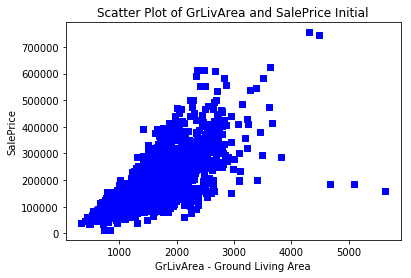

In [36]:
# Looking for outliers
plt.scatter(x = houseData.GrLivArea, y = houseData.SalePrice, c = "blue", marker = "s")
plt.title("Scatter Plot of GrLivArea and SalePrice Initial")
plt.xlabel("GrLivArea - Ground Living Area")
plt.ylabel("SalePrice")
plt.show()

In [37]:
# Remove these outliers to make a good prediction later on
houseData = houseData.drop(houseData[(houseData['GrLivArea']>4000) & (houseData['SalePrice']<300000)].index)

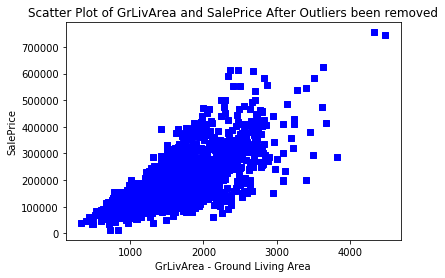

In [38]:
# Display the graph after three outliers have been removed
plt.scatter(x = houseData.GrLivArea, y = houseData.SalePrice, c = "blue", marker = "s" )
plt.title("Scatter Plot of GrLivArea and SalePrice After Outliers been removed")
plt.xlabel("GrLivArea - Ground Living Area")
plt.ylabel("SalePrice")
plt.show()

Now we plot SalePrice with 'OverallQual' (Rates the overall material and finish of the house).
From the picture below, we can see that if the house is having better overal quality, then the price will also better.

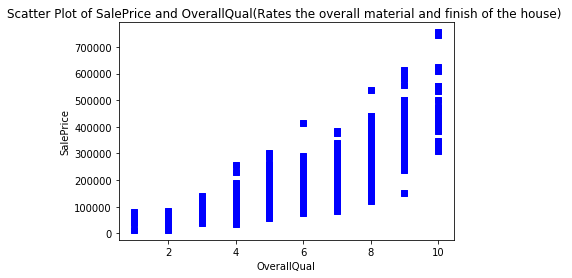

In [39]:
# Plot 'SalePrice' and 'OverallQual' (Rates the overall material and finish of the house)
plt.scatter(x = houseData.OverallQual, y = houseData.SalePrice, c = "blue", marker = "s")
plt.title("Scatter Plot of SalePrice and OverallQual(Rates the overall material and finish of the house) ")
plt.xlabel("OverallQual")
plt.ylabel("SalePrice")
plt.show()

We now plot SalePrice with 'ExterQual' (Evaluates the quality of the material on the exterior).
From the picture below, we can see that if the house is having better ExterQual(Evaluates the quality of the material on the exterior), then the price will also better.

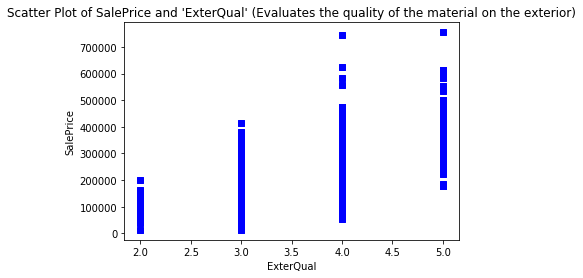

In [40]:
# Plot 'SalePrice' and 'ExterQual' (Evaluates the quality of the material on the exterior).
plt.scatter(x = houseData.ExterQual, y = houseData.SalePrice, c = "blue", marker = "s")
plt.title("Scatter Plot of SalePrice and 'ExterQual' (Evaluates the quality of the material on the exterior)")
plt.xlabel("ExterQual")
plt.ylabel("SalePrice")
plt.show()

We see the distribution of label values (SalePrice)

/root/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


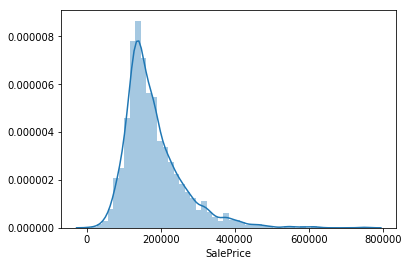

In [41]:
# Check the distribution of label values (SalePrice)
sbn.distplot(houseData['SalePrice'])


In [42]:
# Skewness metric
houseData['SalePrice'].skew()

1.7425011929188197

The skewness value > 1 ==> data is highly skewed. (Ref: https://medium.com/@TheDataGyan/day-8-data-transformation-skewness-normalization-and-much-more-4c144d370e55 ). We can use Logarithm transformation to normalize the SalePrice data. A normalized label helps in better modeling the relationship between label values and independent features.

In [43]:
normalized_saleprice = np.log(houseData['SalePrice'])
print('Check skewness:', normalized_saleprice.skew())

Check skewness: -0.01437359054172442


/root/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


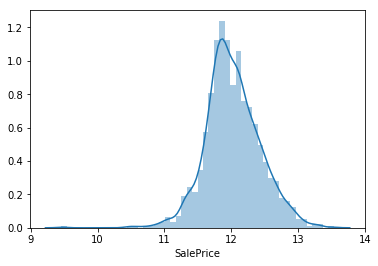

In [44]:
sbn.distplot(normalized_saleprice)

In [45]:
# We check the type of all columns in dataframe houseData
houseData.dtypes

MSSubClass         int64
MSZoning           int64
LotFrontage      float64
LotArea            int64
Street             int64
Alley              int64
LotShape           int64
LandContour        int64
Utilities          int64
LotConfig          int64
LandSlope          int64
Neighborhood       int64
Condition1         int64
Condition2         int64
BldgType           int64
HouseStyle         int64
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemod/Add      int64
RoofStyle          int64
RoofMatl           int64
Exterior1st        int64
Exterior2nd        int64
MasVnrType         int64
MasVnrArea         int64
ExterQual          int64
ExterCond          int64
Foundation         int64
BsmtQual           int64
                  ...   
BedroomAbvGr       int64
KitchenAbvGr       int64
KitchenQual        int64
TotRmsAbvGrd       int64
Functional         int64
Fireplaces         int64
FireplaceQu        int64
GarageType         int64
GarageYrBlt        int64


## Divide the houseData into trainset and testset, then normalize x_train an x_test by using StandardScaler

In [46]:
# We use sklearn.model_selection import train_test_split to split the dataframe into trainset and testset
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler
   
#Divide data into training set and test set = 70 % : 30%
trainset, testset = train_test_split(houseData, test_size=0.3)

# Convert all columns with type integer (except SalePrice) to float 32 to save some memory.
trainset = trainset.astype('float32')
testset = testset.astype('float32')
    
x_trainset = trainset.drop(['SalePrice'],axis=1)
x_testset = testset.drop(['SalePrice'],axis=1)
 
scaler = StandardScaler()

x_train = scaler.fit_transform(trainset.drop(['SalePrice'],axis=1).values)
y_train = scaler.fit_transform(trainset['SalePrice'].values.reshape(-1, 1))
y_train = np.ravel(y_train)

x_test = scaler.fit_transform(testset.drop(['SalePrice'],axis=1).values)
y_test = scaler.fit_transform(testset['SalePrice'].values.reshape(-1, 1))
y_test = np.ravel(y_test)

## GA_ANN Algorithm

**Step 1 Initial population function**

In [47]:
# Initial population function
# pop_size is the number of individuals (rows) in the initial population
# genesPerCh is the number of genes per each individual (features/ columns) 

def generate_pop (pop_size, genesPerCh):                   # assign randomly binary values to each individual
    chromosomes = np.array([np.random.choice([0,1], size=genesPerCh)for individual in range(pop_size)],dtype='int8')   
    return chromosomes   # return the initial population

**Step 2 Decode Function**

In [48]:
# Decode function
# pop is the population to be decoded
# np.argwhere return indices from non-zero genes and flattened the array with np.ravel
def decode_function(pop): 
    selected_features = np.array([np.ravel(np.argwhere(pop[i])) for i in range(pop.shape[0])])
    return selected_features         # return array with selected indices 

**Step 3 ANN Functions**

In [49]:
#ANN with SKlearn
from sklearn.neural_network import MLPRegressor  

def NeuralNetwork(train_x, train_y):
    mlp = MLPRegressor(hidden_layer_sizes=(10),
                       activation='relu',
                       solver='lbfgs',
                       max_iter=1,
                    )
 
    mlp.fit(train_x, train_y)  
    return mlp

def get_predictions_forTrain(features):
    #for given feature indexes, this function will get predictions from neural network for the specified features
    mlp = NeuralNetwork(x_train[:,features], y_train)
    predictions = mlp.predict(x_train[:,features])
    return predictions

**Step 4 Fitness Function**

In [50]:
def fitness(pred, real):
    MSE_ANN = mean_squared_error(real , pred)
    RMSE_ANN = np.sqrt(MSE_ANN)
    return (1/RMSE_ANN) #fitness would be the inverse of roo mean square error

#### Step 5 Stopping criteria Fuction

In [51]:
def stoppingCriteria(fitness, pop, fitness_of_featuresSets, n):
    #This functions stops the iteration if after 20x5 iterations, the fitness drops, it takes the population from previous fitness STORED
    global temp_pop #The population which will be used as 
    global temp_fitness
    if len(fitness) < n: #No stopping until we reach nx5 iterations 
        return False
    elif len(fitness) == n: #At nx5th iteration, store the population and its fitness
        temp_pop = pop
        temp_fitness = fitness_of_featuresSets
        return False
    else:
        if fitness[-2] < fitness[-1]: #this means that fitness is increased after 5 iterations
            #keep on storing the latest population and respective fitness PASSED
            #This process can be complicated by using the n-5th and n-10th fitness value, but sometimes, it would take more iteration but the same best fitness
            temp_pop = pop
            temp_fitness = fitness_of_featuresSets
            return False
        else: #if it drops from the value 5 iterations before, stop the process
            return True #return true only when it is smaller than previous one. Temp_pop will be the previous population

**Step 6 Roulette Wheel Selection Function**

In [52]:
def RouletteWheel_Selection(pop,fitness):
    porps = (fitness/np.sum(fitness))  # calculate the proportions of all fitnesses   
    fitness_pop = np.hstack([pop,porps]) # add the proportions to population
    new_parents = np.zeros(pop.shape,dtype='int8')
    for chromosome in range(new_parents.shape[0]) :
        pick = np.random.uniform(0,1)         # pick random number from 0 to summation of proportions
        index = np.argwhere(fitness_pop[:,-1].cumsum()>pick)[0]  # go through the population and sum the fitnesses and 
        new_parents[chromosome] = fitness_pop[index,:-1]         # return the chromosome when the sum of fitnesses is 
                                                                 # greater than pick number
    return new_parents   # return the selected parents 

**Step 7 Uniform Crossover Function**

In [53]:
def uniformCrossover(population):
    offspring = np.zeros_like(population)
    p1 = population[::2] #Even indexes 0,2,4... would be parent 1
    p2 = population[1::2] #Odd indexes 1,3,5... would be parent 2
    if len(p1)!=len(p2): #If population size is odd the p1 would be larger thatn p2
        #We won't be doing the crossover of last individual of the mutation pool and copy it as it is to the offspring
        offspring[-1] = p1[-1]
        p1 = p1[:-1]
    swap = np.random.choice([True,False], size=p1.shape) #generate True or False of every parent set.
    #True means swap the cell from p1 with p1. False means no swapping
    #Even rows of offspring would be p1 and odd would be p2
    offspring[:-1:2] = np.where(swap, p2, p1) #if swap is true for a cell, even row would have p2 for that gene. Other-wise p1 
    offspring[1::2] = np.where(swap, p1, p2) #if swap is true for a cell, odd row would have p1 for that gene. Other-wise p2
    return offspring

**Step 8 Mutation**

In [54]:
# Mutiation function with default mutation probability as 0.3
def bitFlipMutation(offspring, p = 0.3):
    toMutate = np.sort(np.random.randint(offspring.shape[0], size=int(offspring.shape[0]*p))) #Select the chromosomes you want to apply Mutation on
    bitPos = np.random.randint(offspring[toMutate].shape[1], size=offspring[toMutate].shape[0]) #generate a random gene position to flip for selected chromosomes
    offspring[toMutate, bitPos] = np.where(offspring[toMutate, bitPos],0,1) #if value is 1, replace it by 0 and vice-versa
    return offspring

**MAIN Part**

In [55]:
pop_size = 100 #size of the initial population
pred_train = np.frompyfunc(get_predictions_forTrain, 1, 1) #Function to get prediction array corresponding to all the slected features in the population
fVec = np.vectorize(fitness, excluded=['real'], otypes=[np.float32]) #vectorized funtion to get the fitness of every individual in the population
house_features = houseData.columns[:-1] #Names of features
genesPerCh = house_features.size #genes per chromosome
pop = generate_pop(pop_size, genesPerCh) #Generate initial population. This will be updated in every generation
selected_features = decode_function(pop)
number_of_generations = 201 #the values is set to have mod5 = 1 for a complete plot
avgFitnessPerGeneration = [] #average of fitness values of the individuals in every fifth generation
maxFitnessPerGeneration = [] #maximum of fitness values of the individuals in every fifth generation
minFitnessPerGeneration = [] #minumum of fitness values of the individuals in every fifth generation
for iteration in range(number_of_generations):
    s_predictions = pred_train(selected_features) #predicted labels for train data for each individual in the population
    fitness_of_featuresSets = fVec(pred = s_predictions, real = y_train) #for every predicted array, get the fitness for each individual
    fitness_of_featuresSets = fitness_of_featuresSets.reshape(fitness_of_featuresSets.shape[0],1)  #taking the transpose to get proper dimensions for future computations
    if iteration%5 == 0: #max, min and average values will only be stored for every 5th iteration
        avgFitnessPerGeneration.append(np.mean(fitness_of_featuresSets))
        maxFitnessPerGeneration.append(np.max(fitness_of_featuresSets))
        minFitnessPerGeneration.append(np.min(fitness_of_featuresSets))
        if stoppingCriteria(maxFitnessPerGeneration, pop, fitness_of_featuresSets, n=15): #checking if the stopping criteria is met
            selectedPop = temp_pop #temp pop is selected to get the best individual
            fitnessForSelectedPop = temp_fitness #the corresponding fitness for the population
            indPos = np.argmax(fitnessForSelectedPop) #get the index where the best betness resides
            bestInd = selectedPop[indPos] #get the best pop corresponding to best fitness
            break  #no more generations if stopping criteria is met
    mating_pool = RouletteWheel_Selection(pop, fitness_of_featuresSets)
    #CrossOver
    offspring = uniformCrossover(mating_pool) 
    #Mutation
    offspring = bitFlipMutation(offspring)
    #updating population for next generation
    pop = offspring
    #updating features for next iteration
    selected_features= decode_function(offspring)

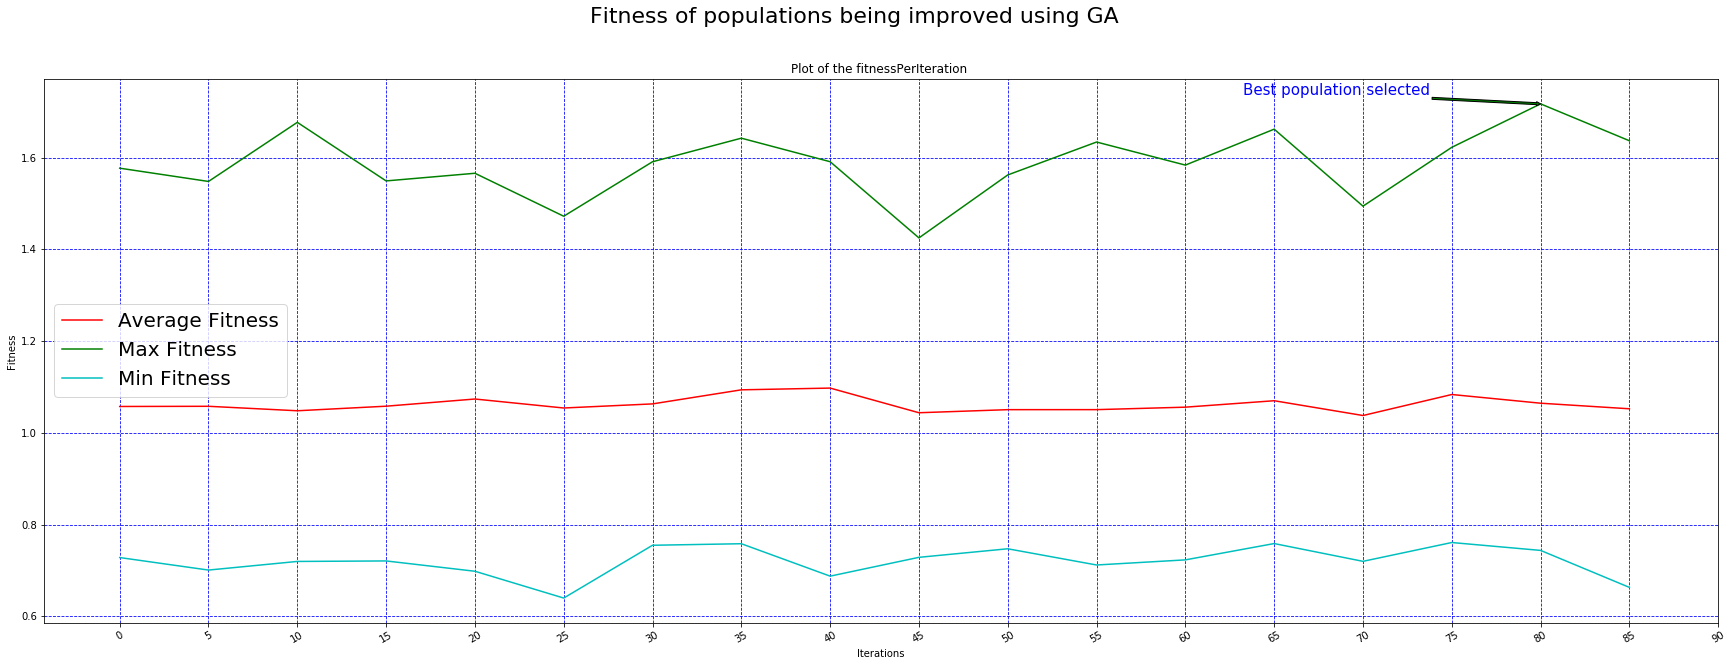

In [56]:
#plot fitnessPerGeneration
fig = plt.figure(figsize=(30,10))
ax = fig.add_subplot(1, 1, 1)
#set title of the graph/plot
ax.set_title('Plot of the fitnessPerIteration ')
#ax.set_xlabel('Date')
ax.plot(avgFitnessPerGeneration, 'r', label='Average Fitness')
ax.plot(maxFitnessPerGeneration, 'g', label='Max Fitness')
ax.plot(minFitnessPerGeneration, 'c', label='Min Fitness')
ax.legend(loc='best', prop={'size': 20}) 
_ = fig.suptitle('Fitness of populations being improved using GA', fontsize=22)
ax.grid(color = 'b', linestyle='--')
xticks = list(range(0,len(maxFitnessPerGeneration)+1,1))
xticklabels = [x*5 for x in xticks]
props = {'xlabel': 'Iterations',
         'xticks': xticks,
         'ylabel': 'Fitness'
        }
_ = ax.set(**props)
labels = ax.set_xticklabels(xticklabels, rotation=30, fontsize='medium')
#Annotation
xh = (len(maxFitnessPerGeneration)-2)
yh = np.max(temp_fitness)
_= ax.annotate('Best population selected', 
                xy = (xh, yh), 
                xytext=(ax.get_xlim()[0]+xh-2.5, yh + 0.045),
                arrowprops=dict(facecolor='green', headwidth=4, width=2,
                                headlength=4),
                horizontalalignment='left', verticalalignment='top', color='blue', size=15
                )

#### The most important features that give the best fitness are:

In [57]:
print(np.ravel(house_features[np.argwhere(bestInd)]))

['MSSubClass' 'MSZoning' 'LotFrontage' 'LotShape' 'LandContour'
 'Utilities' 'Neighborhood' 'Condition1' 'BldgType' 'HouseStyle'
 'OverallQual' 'Exterior1st' 'ExterCond' 'BsmtFinSF1' 'BsmtUnfSF'
 'TotalBsmtSF' 'HeatingQC' 'Electrical' '2ndFlrSF' 'GrLivArea'
 'BsmtHalfBath' 'FullBath' 'HalfBath' 'KitchenAbvGr' 'KitchenQual'
 'TotRmsAbvGrd' 'Functional' 'Fireplaces' 'GarageYrBlt' 'GarageCars'
 'GarageCond' 'EnclosedPorch' '3SsnPorch' 'PoolArea' 'PoolQC' 'Fence'
 'MiscFeature' 'MoSold' 'YrSold' 'SaleType' 'SaleCondition']


**Evaluate with the test set**

In [58]:
def get_predictions_forTest(features):
    #for given feature indexes, this function will get predictions from neural network for the specified features
    mlp = NeuralNetwork(x_train[:,features], y_train)
    predictions = mlp.predict(x_test[:,features])
    return predictions

In [59]:
# get predictions on testset
pred_test = np.frompyfunc(get_predictions_forTest, 1, 1) #Function to get prediction array corresponding to all the slected features
selected_features_test = decode_function(selectedPop) #get selected features by GA
s_predictions_test = pred_test(selected_features_test) #predicted labels for test set
fitness_of_featuresSets_test = fVec(pred = s_predictions_test, real = y_test) #for every predicted array, get the fitness for each individual
fitness_of_featuresSets_test = fitness_of_featuresSets_test.reshape(fitness_of_featuresSets_test.shape[0],1)  #taking the transpose to get proper dimensions for future computations

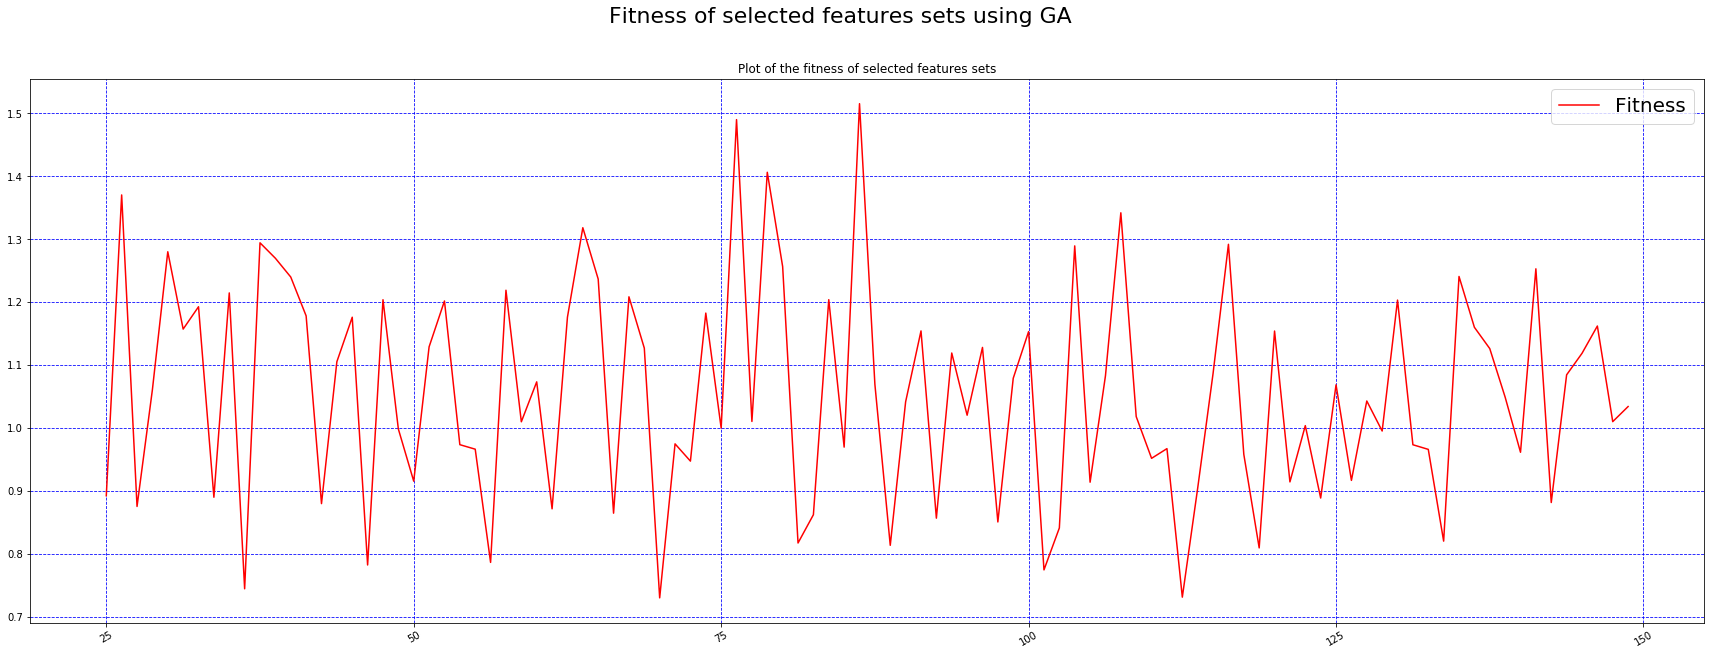

In [75]:
#plot fitness_of_featuresSets_test
fig = plt.figure(figsize=(30,10))
ax = fig.add_subplot(1, 1, 1)
#set title of the graph/plot
ax.set_title('Plot of the fitness of selected features sets')

ax.plot(fitness_of_featuresSets_test, 'r', label='Fitness')
ax.legend(loc='best', prop={'size': 20}) 
_ = fig.suptitle('Fitness of selected features sets using GA', fontsize=22)
ax.grid(color = 'b', linestyle='--')
xticks = list(range(0,len(fitness_of_featuresSets_test)+1,5))
xticklabels = [x*5 for x in xticks]

labels = ax.set_xticklabels(xticklabels, rotation=30, fontsize='medium')

In [61]:
# Denormalize data after normalizing to get original scale of values

def denormalize(dataset, scaled_data):
    dataset = dataset['SalePrice'].values.reshape(-1,1)
    normalized_data = scaled_data.reshape(-1,1)
    scaler = StandardScaler()
    scaler.fit_transform(dataset)
    return scaler.inverse_transform(normalized_data)

In [62]:
# denormalize y test and predictions
de_y_test = denormalize(testset, y_test)
de_pred = denormalize(testset, s_predictions_test)
# de_pred = np.abs(de_pred)
# make the predictions array flat
fitness_values = np.ravel(fitness_of_featuresSets_test)

de_pred_max = de_pred[np.argmax(fitness_values)][0] # predictions with max fitness in selected features set
de_pred_min = de_pred[np.argmin(fitness_values)][0] # and min fitness

# index of fitness value that's nearest to the average fitness of selected features set
average_idx = (np.abs(fitness_values - np.average(fitness_values))).argmin()
de_pred_average = de_pred[average_idx][0]

In [63]:
def plot_test_result(pred, test_y, fra=0, color='blue', label='predictions'):
    #Plotting real value against prediction value over a period
    fig = plt.figure(1, figsize=(20,12))
    ax = fig.add_subplot(1, 1, 1)
    ax.set_title("House Prices's Prediction", fontsize=20)
    ax.plot(test_y[fra:], color='red', label='real', linewidth=3)
    ax.plot(pred[fra:], color=color, label=label, linewidth=3)
        
    ax.legend(loc='best')
    plt.ylabel('Price')
    plt.show()

In [64]:
def mse_result(test, pred):
    MSE = mean_squared_error(test , pred) 
    RMSE = np.sqrt(MSE)
    fitness = 1/RMSE
    print("MSE %.4f"% MSE)
    print("RMSE %.4f"% RMSE)
    print("Fitness %.8f"% fitness)

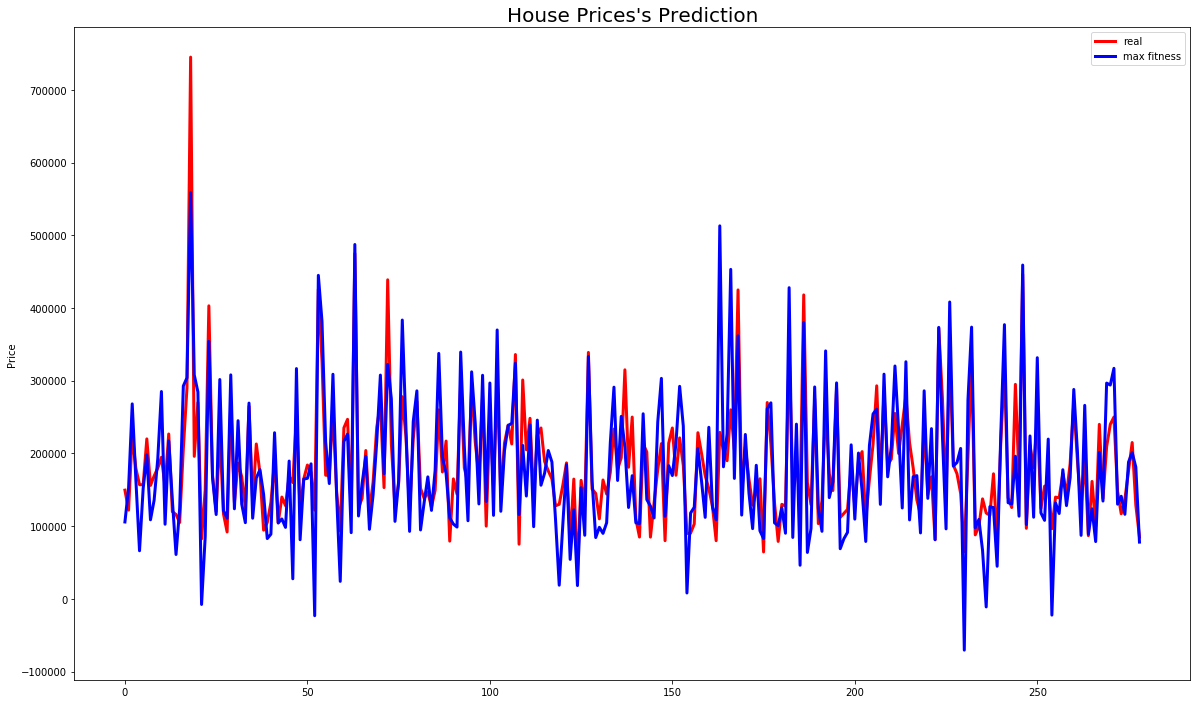

In [65]:
plot_test_result(de_pred_max, de_y_test, fra=600, label='max fitness')

In [66]:
mse_result(de_y_test , de_pred_max)

MSE 2980709998.6613
RMSE 54595.8790
Fitness 0.00001832


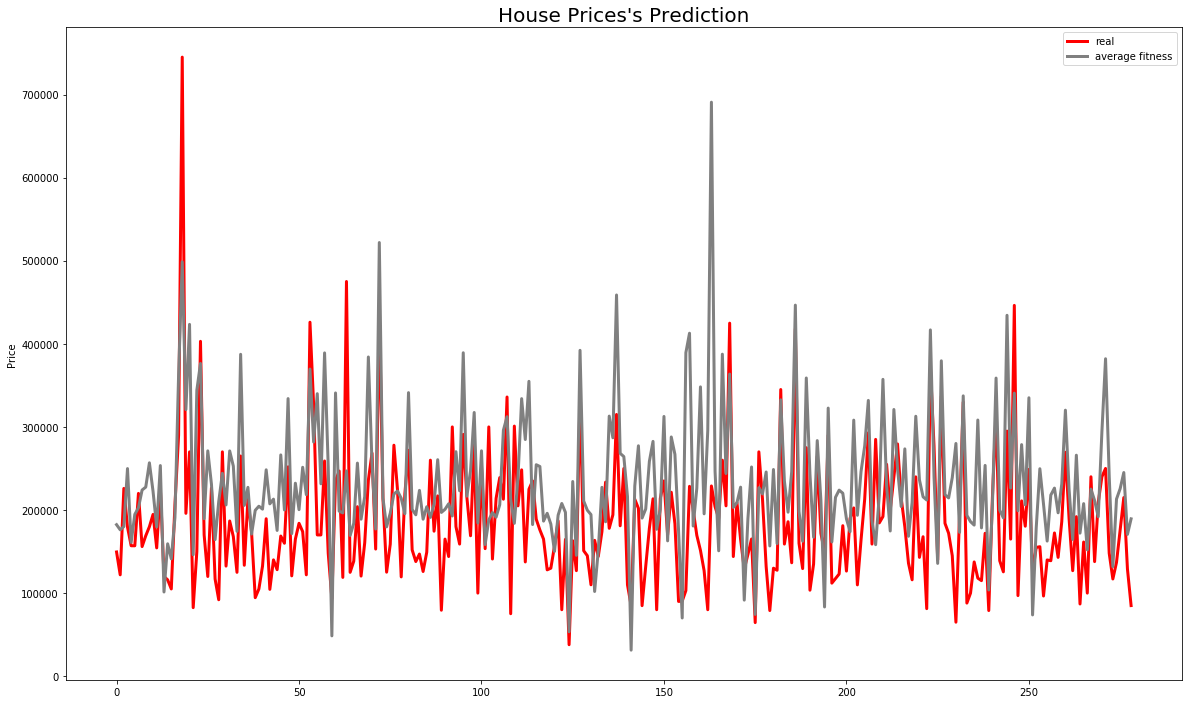

In [67]:
plot_test_result(de_pred_average, de_y_test, fra=600, color='gray', label='average fitness')

In [68]:
mse_result(de_y_test , de_pred_average)

MSE 6080455507.3518
RMSE 77977.2756
Fitness 0.00001282


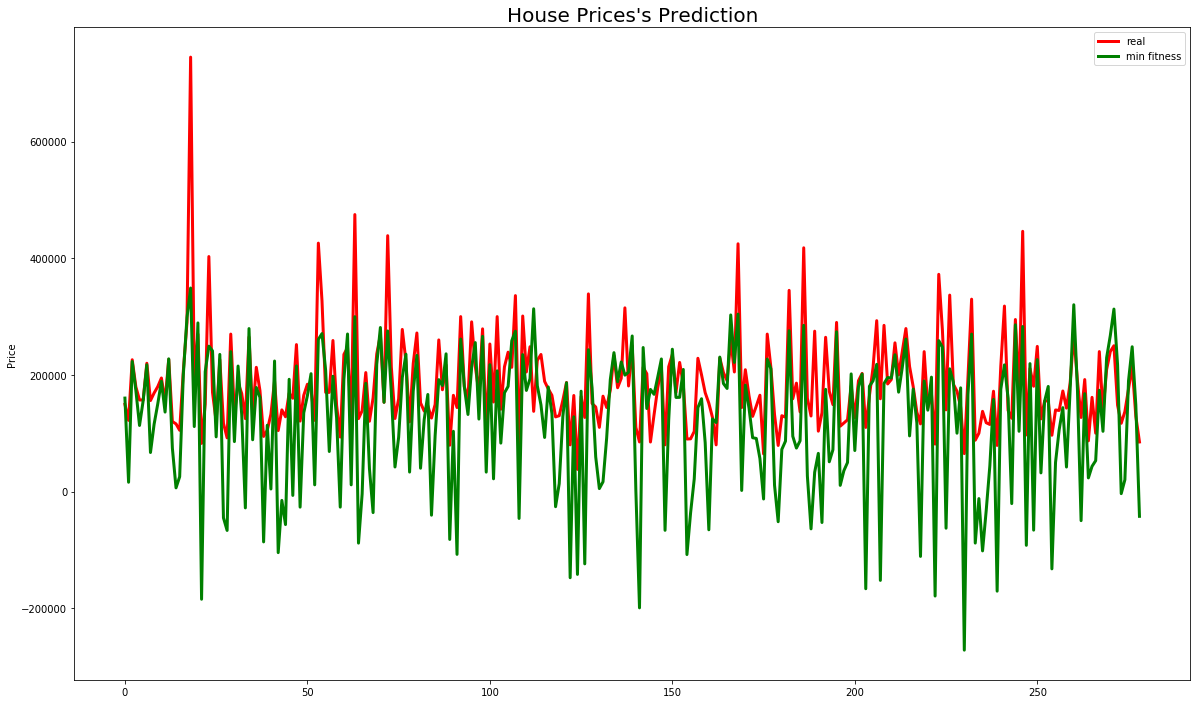

In [69]:
plot_test_result(de_pred_min, de_y_test, fra=600, color='green', label='min fitness')

In [70]:
mse_result(de_y_test , de_pred_min)

MSE 12838898103.2783
RMSE 113308.8615
Fitness 0.00000883


### House prices's prediction without feature selection:

In [71]:
# create mlp model, then we fit the training data to the model and we use x_test to get the predictions
mlp = MLPRegressor(hidden_layer_sizes=(10),activation='relu',solver='lbfgs',max_iter=1,)
mlp.fit(x_train, y_train)  
pred = mlp.predict(x_test)

In [72]:
# Denormalize the data to get the original scale of values
de_pred = denormalize(testset, pred)
mse_result(de_y_test, de_pred)

MSE 6749925761.0119
RMSE 82157.9318
Fitness 0.00001217


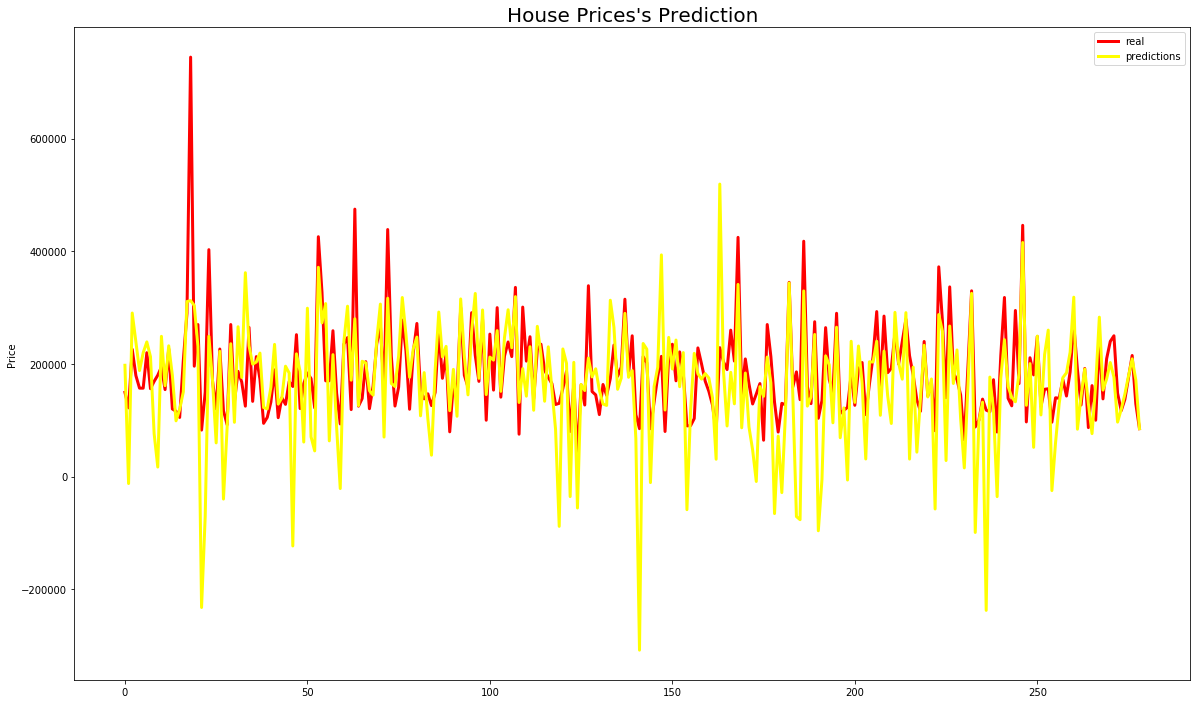

In [73]:
# Plot real values against prediction values 
plot_test_result(de_pred, de_y_test, fra=600, color='yellow', label='predictions')